In [1]:
import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

In [2]:
training_data = CIFAR10(root="./", train=True, download=True, transform=ToTensor())
test_data = CIFAR10(root="./", train=False, download=True, transform=ToTensor())

100%|███████████████████████████████████████████████████████████████████████████████| 170M/170M [00:11<00:00, 15.2MB/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


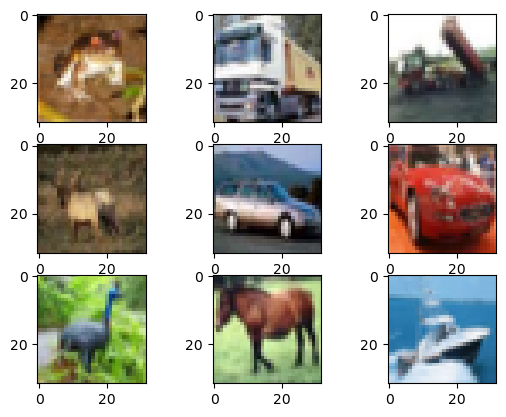

In [4]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(training_data.data[i])

plt.show()

# 데이터 증강

In [5]:
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose, RandomCrop, RandomHorizontalFlip

In [6]:
transforms = Compose(
    [
        T.ToPILImage(),
        # 최종 크기를 (32, 32), 자르기 전 각 이미지 끝에 4픽셀의 패딩 추가
        RandomCrop((32, 32), padding=4),
        # p 확률로 이미지 좌우 대칭
        RandomHorizontalFlip(p=0.5),
    ]
)

In [7]:
training_data = CIFAR10(root="./", train=True, download=True, transform=transforms)
test_data = CIFAR10(root="./", train=False, download=True, transform=transforms)

Files already downloaded and verified
Files already downloaded and verified


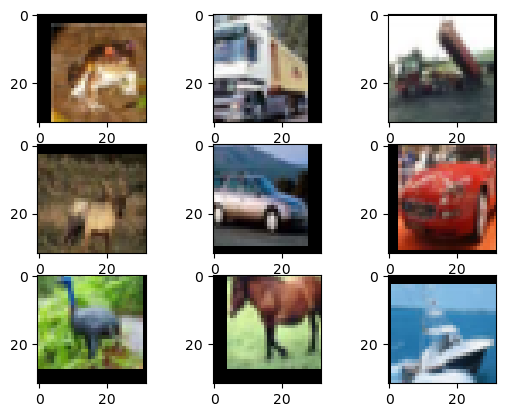

In [9]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(transforms(training_data.data[i]))

plt.show()

# 이미지 정규화

In [10]:
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose, Normalize, RandomCrop, RandomHorizontalFlip

In [11]:
transforms = Compose(
    [
        T.ToPILImage(),
        RandomCrop((32, 32), padding=4),
        RandomHorizontalFlip(p=0.5),
        T.ToTensor(),
        Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
        T.ToPILImage(),
    ]
)

In [12]:
training_data = CIFAR10(root="./", train=True, download=True, transform=transforms)
test_data = CIFAR10(root="./", train=False, download=True, transform=transforms)

Files already downloaded and verified
Files already downloaded and verified


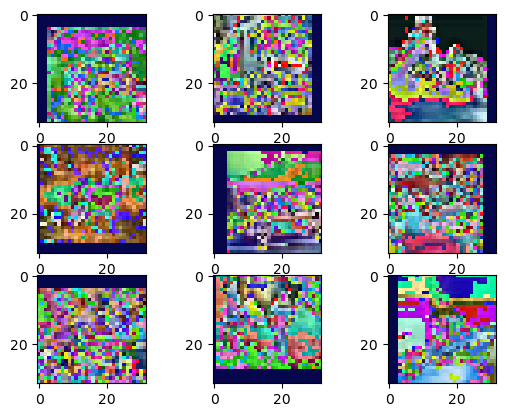

In [13]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(transforms(training_data.data[i]))

plt.show()